# Multiple View Geometry
## Two-View Geometry

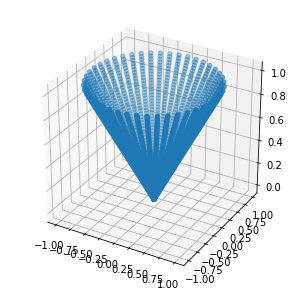

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from math import pi, cos, sin

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

def cone():
    # cone is centered at 0,0,0
    points = []
    for z in np.linspace(0, 1, 50):
        r = z
        for a in np.linspace(0, 2*pi, 45):
            x = r * cos(a)
            y = r * sin(a)
            points.append([x, y, z])
    return np.array(points)
          
def eulerAnglesToRotationMatrix(ax, ay, az) :  
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         cos(ax), -sin(ax) ],
                    [0,         sin(ax), cos(ax)  ]
                    ])
         
         
                     
    R_y = np.array([[cos(ay),    0,      sin(ay)  ],
                    [0,                     1,      0                   ],
                    [-sin(ay),   0,      cos(ay)  ]
                    ])
                 
    R_z = np.array([[cos(az),    -sin(az),    0],
                    [sin(az),    cos(az),     0],
                    [0,                     0,                      1]
                    ])
                     
                     
    R = np.dot(R_z, np.dot( R_y, R_x ))
 
    return R
        
C = cone()
ax.scatter(C[:,0], C[:,1], C[:,2])
plt.show()


### Epipolar geometry

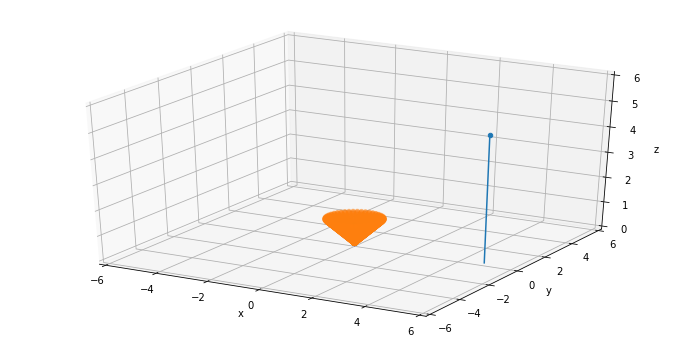

In [31]:
import cv2

C = cone()

K1 = np.eye(3); K1[0,2] = 100; K1[1,2] = 100
K2 = np.eye(3); K2[0,2] = 100; K2[1,2] = 100

pos1 = np.array([5,0,5])
R1 = eulerAnglesToRotationMatrix(-pi, 0, 0)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos1[0], pos1[1], pos1[2])
ax.plot([pos1[0]]*2, [pos1[1]]*2, [0, pos1[2]])

# --- plot ---
ax.scatter(C[:,0], C[:,1], C[:,2])
ax.set_xlim([-6, 6]); ax.set_ylim([-6, 6]); ax.set_zlim([0, 6])
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()